## Interprovincial Migration - Canada

Data source: https://www150.statcan.gc.ca/n1/tbl/csv/17100022-eng.zip

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = 'data'
sub_dir = '17100022-eng'
filename = '17100022.csv'
plot_dir = 'plots'

In [3]:
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

In [4]:
filepath = os.path.join(data_dir, sub_dir, filename)
df = pd.read_csv(filepath)
df.shape

(7008, 15)

In [5]:
df.head()

,REF_DATE,GEO,DGUID,"Geography, province of destination",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1971/1972,"Newfoundland and Labrador, province of origin",2016A000210,"Prince Edward Island, province of destination",Persons,249,units,0,v466446,1.2,141,NaN,NaN,NaN,0
1,1971/1972,"Newfoundland and Labrador, province of origin",2016A000210,"Nova Scotia, province of destination",Persons,249,units,0,v466451,1.3,1451,NaN,NaN,NaN,0
2,1971/1972,"Newfoundland and Labrador, province of origin",2016A000210,"New Brunswick, province of destination",Persons,249,units,0,v466452,1.4,1042,NaN,NaN,NaN,0
3,1971/1972,"Newfoundland and Labrador, province of origin",2016A000210,"Quebec, province of destination",Persons,249,units,0,v466453,1.5,1104,NaN,NaN,NaN,0
4,1971/1972,"Newfoundland and Labrador, province of origin",2016A000210,"Ontario, province of destination",Persons,249,units,0,v466454,1.6,6733,NaN,NaN,NaN,0


In [6]:
df.GEO.unique()

array(['Newfoundland and Labrador, province of origin',
       'Prince Edward Island, province of origin',
       'Nova Scotia, province of origin',
       'New Brunswick, province of origin', 'Quebec, province of origin',
       'Ontario, province of origin', 'Manitoba, province of origin',
       'Saskatchewan, province of origin', 'Alberta, province of origin',
       'British Columbia, province of origin',
       'Yukon, province of origin',
       'Northwest Territories including Nunavut, province of origin',
       'Northwest Territories, province of origin',
       'Nunavut, province of origin'], dtype=object)

In [7]:
df['Geography, province of destination'].unique()

array(['Prince Edward Island, province of destination',
       'Nova Scotia, province of destination',
       'New Brunswick, province of destination',
       'Quebec, province of destination',
       'Ontario, province of destination',
       'Manitoba, province of destination',
       'Saskatchewan, province of destination',
       'Alberta, province of destination',
       'British Columbia, province of destination',
       'Yukon, province of destination',
       'Northwest Territories including Nunavut, province of destination',
       'Newfoundland and Labrador, province of destination',
       'Northwest Territories, province of destination',
       'Nunavut, province of destination'], dtype=object)

In [8]:
df.REF_DATE.unique()

array(['1971/1972', '1972/1973', '1973/1974', '1974/1975', '1975/1976',
       '1976/1977', '1977/1978', '1978/1979', '1979/1980', '1980/1981',
       '1981/1982', '1982/1983', '1983/1984', '1984/1985', '1985/1986',
       '1986/1987', '1987/1988', '1988/1989', '1989/1990', '1990/1991',
       '1991/1992', '1992/1993', '1993/1994', '1994/1995', '1995/1996',
       '1996/1997', '1997/1998', '1998/1999', '1999/2000', '2000/2001',
       '2001/2002', '2002/2003', '2003/2004', '2004/2005', '2005/2006',
       '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011',
       '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019'], dtype=object)

In [9]:
origin = 'British Columbia, province of origin'
destination = 'British Columbia, province of destination'

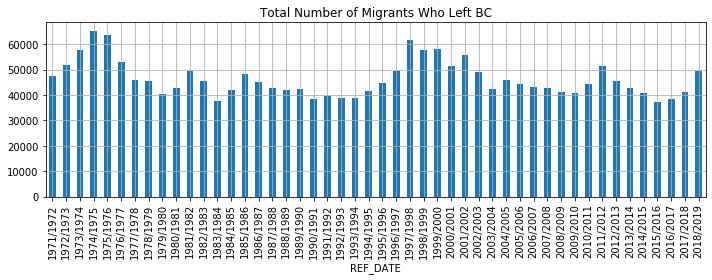

In [10]:
departures = df.loc[df.GEO == origin]
total_departures_by_year = departures.groupby('REF_DATE').sum()['VALUE'].rename('Total Departures')
total_departures_by_year.plot.bar(figsize=(10,4))
plt.title('Total Number of Migrants Who Left BC')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'total-migration.png'), dpi=200)
plt.show()

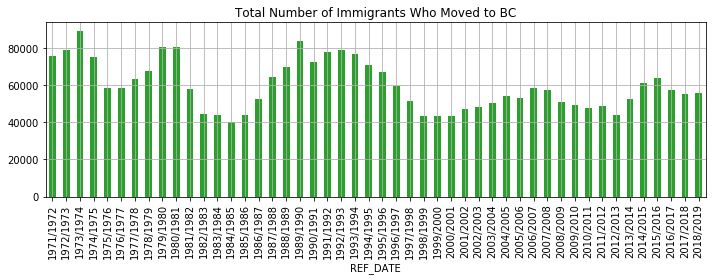

In [11]:
arrivals = df.loc[df['Geography, province of destination'] == destination]
total_arrivals_by_year = arrivals.groupby('REF_DATE').sum()['VALUE'].rename('Total Arrivals')
total_arrivals_by_year.plot.bar(figsize=(10,4), color='tab:green')
plt.title('Total Number of Immigrants Who Moved to BC')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'total-immigration.png'), dpi=200)
plt.show()

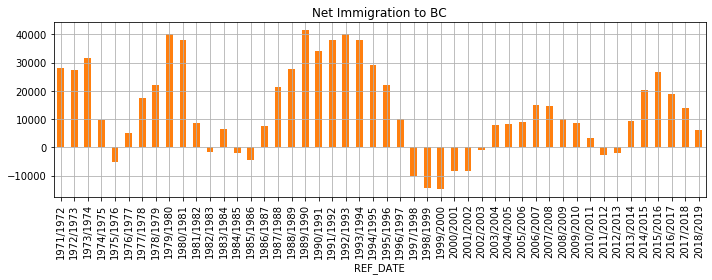

In [12]:
net_immigration_by_year = (total_arrivals_by_year - total_departures_by_year).rename('Net Immigration')
net_immigration_by_year.plot.bar(figsize=(10,4), color='tab:orange')
plt.title('Net Immigration to BC')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir,'net-immigration.png'), dpi=200)
plt.show()

In [13]:
pd.concat([
    total_arrivals_by_year,
    total_departures_by_year,
    net_immigration_by_year
], axis=1).tail(15)

,Total Arrivals,Total Departures,Net Immigration
REF_DATE,,,
2004/2005,54280,46066,8214
2005/2006,53096,44296,8800
2006/2007,58182,43177,15005
2007/2008,57396,42753,14643
2008/2009,51061,41066,9995
2009/2010,49469,40741,8728
2010/2011,47854,44433,3421
2011/2012,48593,51304,-2711
2012/2013,43830,45698,-1868
